In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
imdb=pd.read_csv('/content/imdb_data.csv')

In [54]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [55]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


In [56]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


In [57]:
from sklearn.impute import KNNImputer

In [58]:
imputer = KNNImputer(n_neighbors=5)

In [59]:
imdb[['budget','gross']]=imputer.fit_transform(imdb[['budget','gross']])

In [60]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [61]:
imdb=imdb.dropna(subset=['release_date'])

In [62]:
imdb.shape

(3343, 12)

In [63]:
imdb.shape

(3343, 12)

In [64]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [65]:


#lets find out  How many unique movies are in the dataset?

In [66]:
imdb['id'].nunique()

3343

In [67]:

#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, ' distribution of movie runtime.')

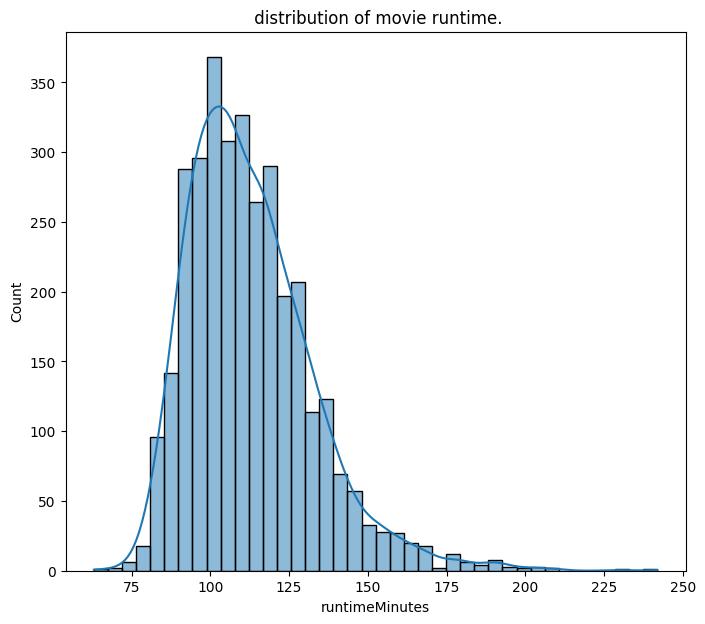

In [68]:
plt.figure(figsize=(8,7))
sns.histplot(x=imdb['runtimeMinutes'],kde=True,bins=40)
plt.title(' distribution of movie runtime.')

In [69]:

#as we see the distribution. it seems like normal distribution. but lets check for the outliers also


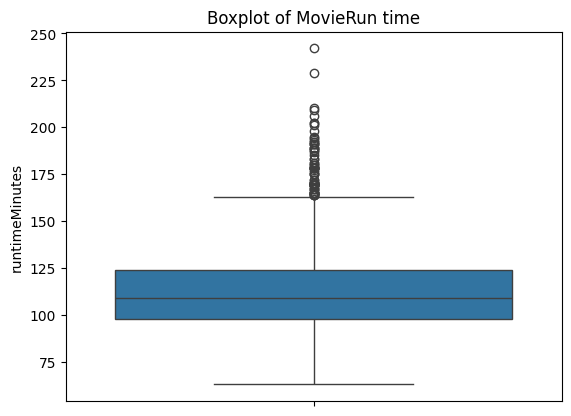

In [70]:
sns.boxplot(imdb['runtimeMinutes'])
plt.title('Boxplot of MovieRun time')
plt.savefig('runtimeMinute.png',dpi=620)

In [71]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?


In [72]:
imdb['isAdult']

,isAdult
0,0
1,0
2,0
3,0
4,0
...,...
3343,0
3344,0
3345,0
3346,0


In [73]:
imdb['isAdult'].unique()

array([0])

In [74]:
imdb.drop(columns=['isAdult']).inplace=True

In [75]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000.0,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000.0,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000.0,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [76]:


#What are the top 10 most common movie genres?

In [77]:
genre_list=imdb['genres'].str.split(',').explode()

In [78]:
genre_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [79]:
genre_counts=genre_list.value_counts().head(10)

<ipython-input-80-f3316ee5b389>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index,y=genre_counts.values,palette="rocket")


Text(0.5, 1.0, 'top 10 most common movie genres')

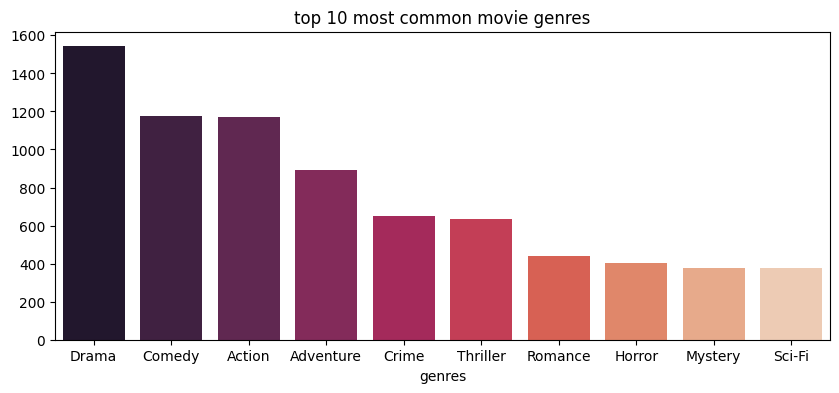

In [80]:
plt.figure(figsize=(10,4))
sns.barplot(x=genre_counts.index,y=genre_counts.values,palette="rocket")
plt.title('top 10 most common movie genres')

In [81]:

#What is the distribution of averageRating? Are ratings skewed toward high or low values

<ipython-input-82-4adf904dac02>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=imdb['averageRating'],palette='rocket',bins=40)


<Axes: xlabel='averageRating', ylabel='Count'>

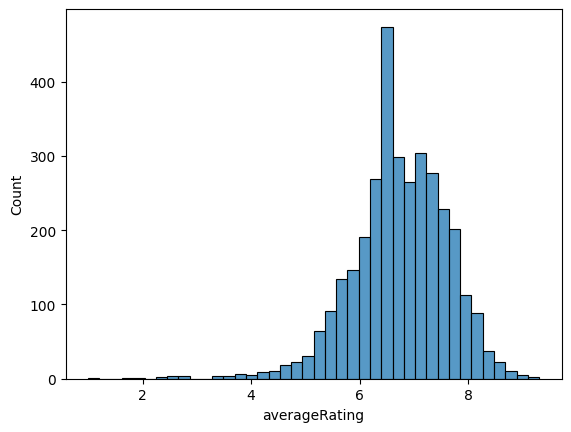

In [82]:
sns.histplot(x=imdb['averageRating'],palette='rocket',bins=40)

In [83]:

#lets see how many movies are very low and very high rated

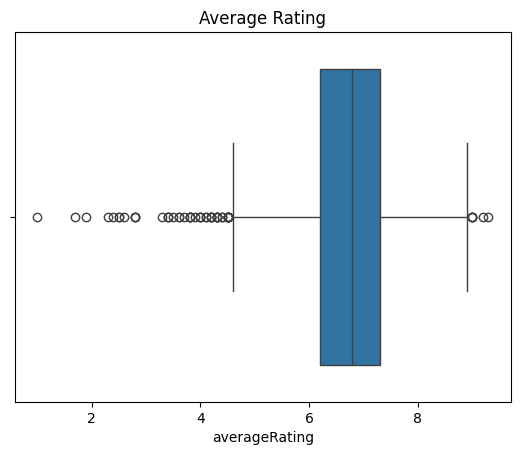

In [84]:
sns.boxplot(x=imdb['averageRating'])
plt.title('Average Rating')
plt.savefig('averageRating',dpi=40)

In [85]:

#How many movies have received over 100,000 votes (numVotes > 100,000)?

In [86]:
high_rated_movies=imdb[imdb['numVotes']>100000]

In [87]:
high_rated_movies.shape

(2099, 12)

<ipython-input-88-72caa36cc639>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=imdb['numVotes'],palette='rocket',bins=70,kde=True)


<Axes: xlabel='numVotes', ylabel='Count'>

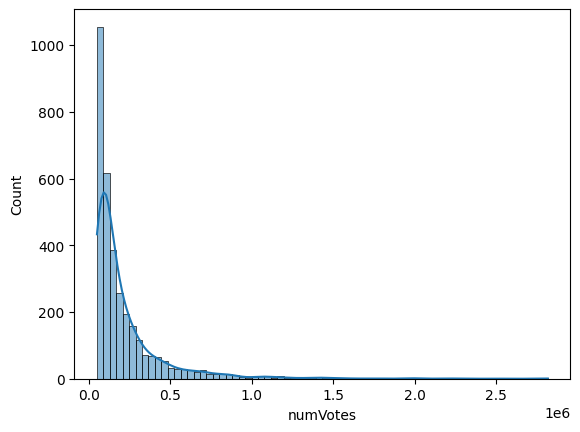

In [88]:
sns.histplot(x=imdb['numVotes'],palette='rocket',bins=70,kde=True)


In [89]:

#7. What is the distribution of movie budgets?

<ipython-input-90-0f705af7b2c2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=imdb['budget'],palette='rocket',kde=True,bins=70)


Text(0.5, 1.0, 'distribution of movies Budget')

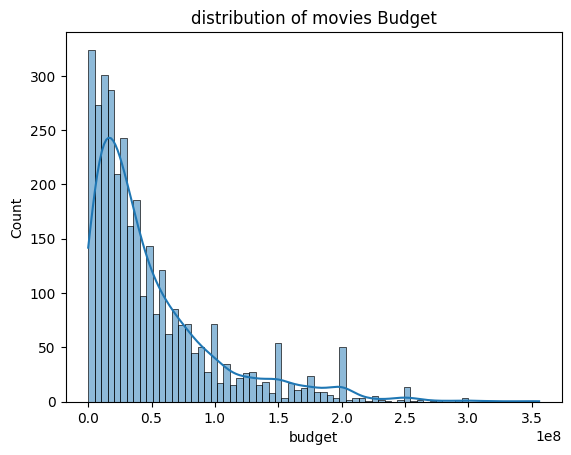

In [90]:
sns.histplot(x=imdb['budget'],palette='rocket',kde=True,bins=70)
plt.savefig('budget',dpi=300)
plt.title('distribution of movies Budget')

Text(0.5, 1.0, 'Distribution of Movies')

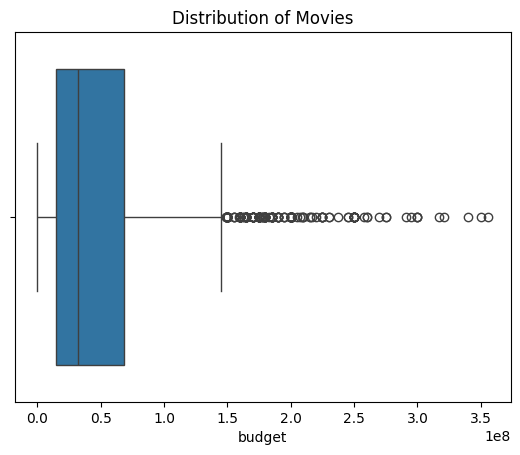

In [91]:
sns.boxplot(x=imdb['budget'])
plt.title('Distribution of Movies')


In [92]:
#. What is the distribution of gross revenue?

<ipython-input-93-2195c252a51f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=imdb['gross'],bins=50,palette='rocket')


<Axes: xlabel='gross', ylabel='Count'>

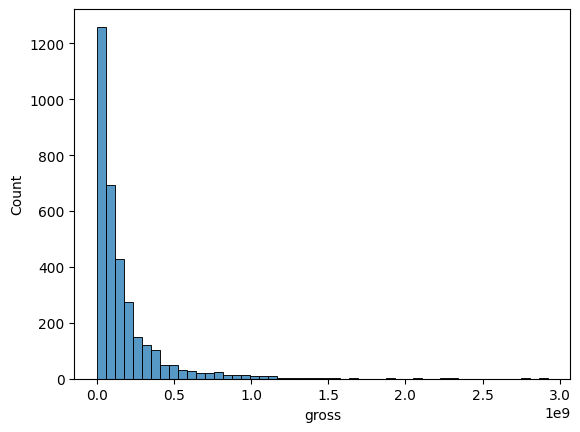

In [93]:
sns.histplot(x=imdb['gross'],bins=50,palette='rocket')

<Axes: xlabel='gross'>

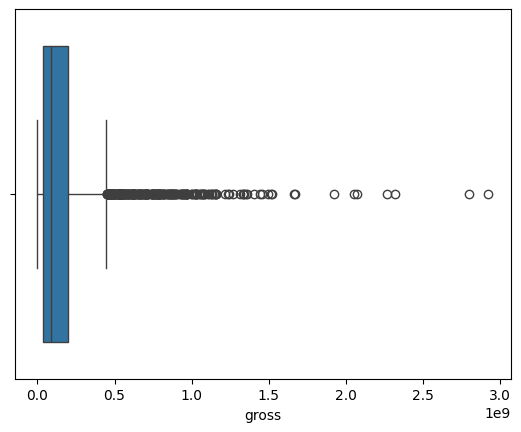

In [94]:
sns.boxplot(x=imdb['gross'])

In [95]:


#What is the average budget and gross revenue of movies?

In [96]:
avg_budget=imdb['budget'].mean()

In [97]:
avg_budget

np.float64(50425817.86299731)

In [98]:
avg_gross=imdb['gross'].mean

In [99]:
avg_gross()

np.float64(167729001.37349686)

<ipython-input-100-0e425a533807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['avg_budget','avg_gross'],


<Axes: >

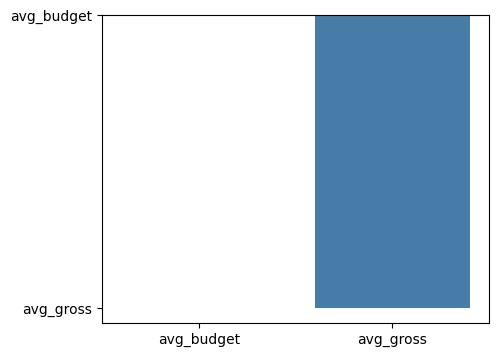

In [100]:
plt.figure(figsize=(5,4))
sns.barplot(x=['avg_budget','avg_gross'],
y=['avg_budget','avg_gross'],palette='Set1')

In [101]:
#Is there a significant correlation between budget and gross revenue?
